# Iris dataset Clustering Algorithm

## Setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
from sklearn.datasets import load_iris

In [28]:
from sklearn.preprocessing import StandardScaler

In [34]:
from sklearn.cluster import KMeans

In [38]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

In [49]:
from sklearn.cluster import AgglomerativeClustering

In [57]:
from scipy.cluster.hierarchy import dendrogram, linkage

## Loading and Preprocessing

In [11]:
iris = load_iris()
data = pd.DataFrame(iris.data,columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [15]:
data.duplicated().sum()

1

In [17]:
data = data.drop_duplicates()

#### outliers detection 

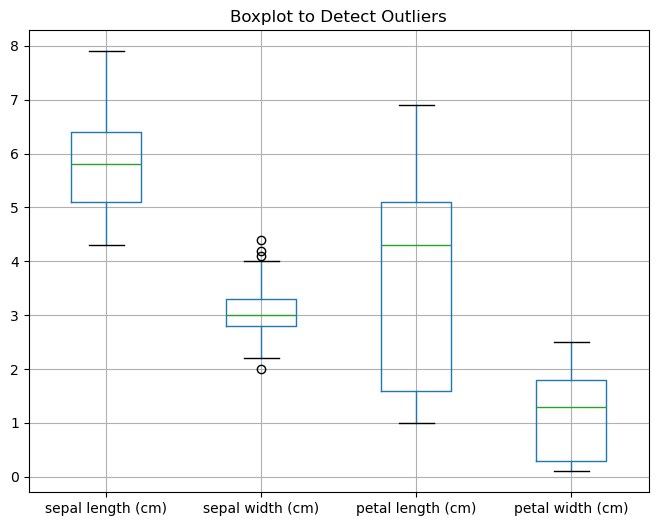

In [20]:
plt.figure(figsize=(8,6))
data.boxplot()
plt.title("Boxplot to Detect Outliers")
plt.show()

In [22]:
print("\nSkewness:\n", data.skew())
print("\nKurtosis:\n", data.kurtosis())


Skewness:
 sepal length (cm)    0.312826
sepal width (cm)     0.307149
petal length (cm)   -0.263101
petal width (cm)    -0.090076
dtype: float64

Kurtosis:
 sepal length (cm)   -0.569006
sepal width (cm)     0.226236
petal length (cm)   -1.408270
petal width (cm)    -1.339953
dtype: float64


## Clustering Algorithm Implementation

In [77]:
X = data.copy()

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


### A) KMeans Clustering

**Description of KMeans**
- KMeans Clustering is an iterative algorithm that assigns each data point to one of 𝑘 clusters based on the distance to the cluster centers (centroids).
- The algorithm works by:
  1. Randomly initializing 𝑘 centroids.
  2. Assigning each data point to the closest centroid.
  3. Recomputing the centroids based on the assigned data points.
  4. Repeating the process until the centroids do not change significantly.

**Why KMeans is Suitable for the Iris Dataset**
- The Iris dataset is relatively small and well-suited for KMeans.
- Since we have numerical features and distinct clusters, KMeans is an effective method for clustering.

In [40]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [42]:
X_scaled['Cluster'] = clusters

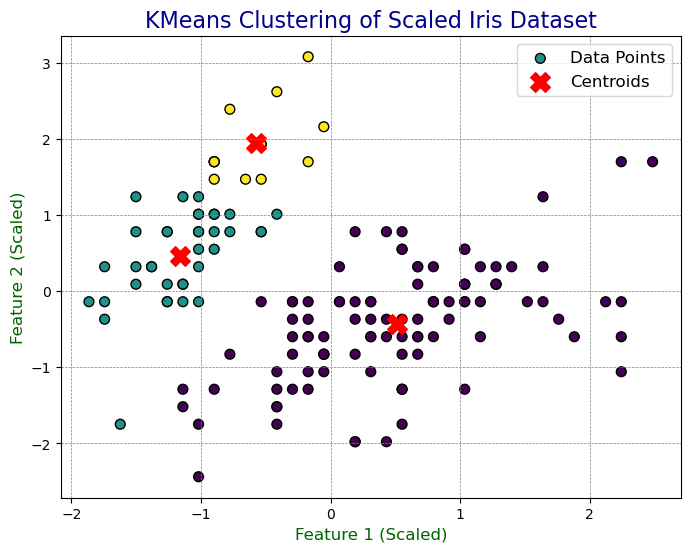

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled.iloc[:, 0], X_scaled.iloc[:, 1], c=clusters, cmap='viridis', s=50,edgecolor='k',label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X',label='Centroids')
plt.title("KMeans Clustering of Scaled Iris Dataset", fontsize=16, color='darkblue')
plt.xlabel("Feature 1 (Scaled)", fontsize=12, color='darkgreen')
plt.ylabel("Feature 2 (Scaled)", fontsize=12, color='darkgreen')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12, loc='upper right')
plt.show()

**Elbow Method**
- The Elbow Method helps to determine the optimal number of clusters by plotting inertia for different values of 
𝑘 and identifying the "elbow" point, where inertia starts to decrease more slowly.

In [67]:
inertia = [] 

In [69]:
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled.iloc[:, :-2])  
    inertia.append(kmeans.inertia_)

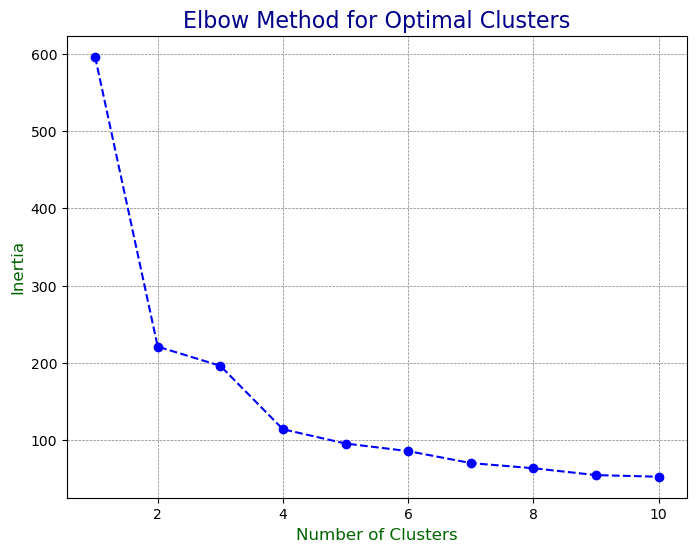

In [71]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='b')
plt.title("Elbow Method for Optimal Clusters", fontsize=16, color='darkblue')
plt.xlabel("Number of Clusters", fontsize=12, color='darkgreen')
plt.ylabel("Inertia", fontsize=12, color='darkgreen')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

### B) Hierarchical Clustering

**Description of Hierarchical Clustering**
- Hierarchical Clustering builds a hierarchy of clusters either in a bottom-up (Agglomerative) or top-down (Divisive) approach.
- Agglomerative Clustering starts with each data point as its own cluster and progressively merges the closest clusters.


**Why Hierarchical Clustering is Suitable for the Iris Dataset**
- Hierarchical Clustering is particularly useful for small datasets like Iris.
- The dendrogram allows us to visualize the merging process and decide on the number of clusters based on a threshold distance.


**Apply Agglomerative Clustering**

In [51]:
hrl = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters_h = hrl.fit_predict(X_scaled.iloc[:, :-1])

In [53]:
X_scaled['Cluster_H'] = clusters_h

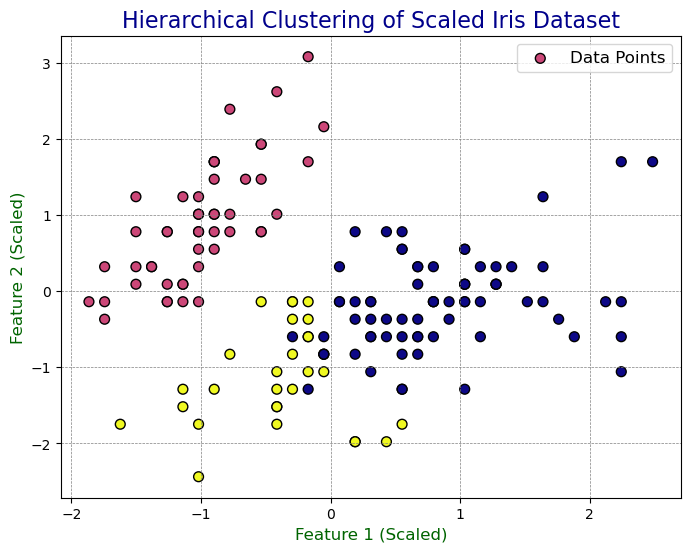

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled.iloc[:, 0], X_scaled.iloc[:, 1], c=clusters_h, cmap='plasma', s=50, edgecolor='k',label='Data Points')
plt.title("Hierarchical Clustering of Scaled Iris Dataset", fontsize=16, color='darkblue')
plt.xlabel("Feature 1 (Scaled)", fontsize=12, color='darkgreen')
plt.ylabel("Feature 2 (Scaled)", fontsize=12, color='darkgreen')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12, loc='upper right')
plt.show()

**Dendrogram with Horizontal Line**
- The dendrogram shows how clusters are merged and can help determine an optimal cutoff.

In [88]:
linkage_matrix = linkage(X_scaled.iloc[:, :-2], method='ward')

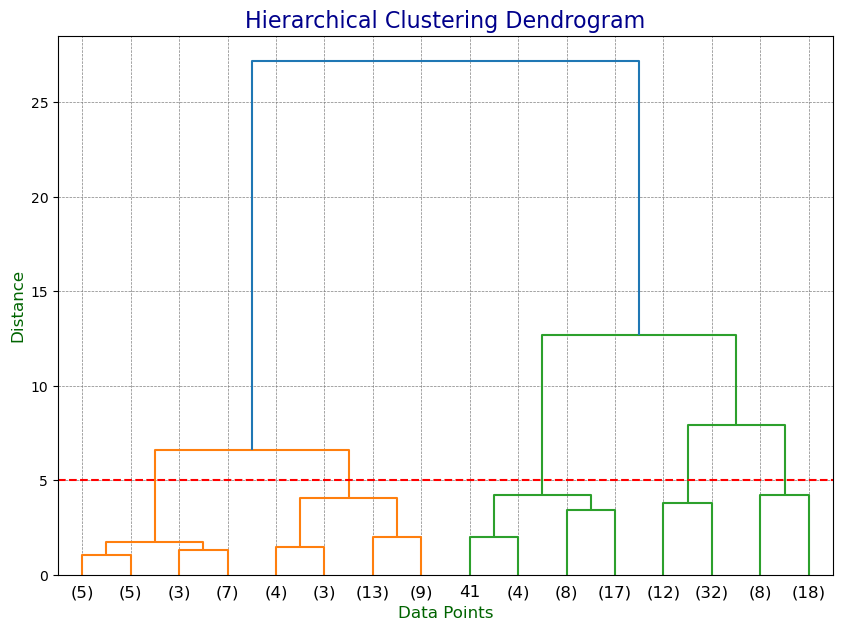

In [65]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=3, color_threshold=0.7 * max(linkage_matrix[:, 2]))
plt.axhline(y=5, color='red', linestyle='--', label='Threshold Line')
plt.title("Hierarchical Clustering Dendrogram", fontsize=16, color='darkblue')
plt.xlabel("Data Points", fontsize=12, color='darkgreen')
plt.ylabel("Distance", fontsize=12, color='darkgreen')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

## Conclusion

- Loaded and Preprocessed the Iris dataset, including missing value checks, duplicates removal, outlier detection, skewness and kurtosis evaluation, and scaling the features.
- Applied KMeans Clustering, visualized the results, and used the Elbow Method to find the optimal number of clusters.
- Implemented Hierarchical Clustering (Agglomerative Clustering) and visualized the results using a dendrogram with a threshold line for better clarity.

                                                                                                                                    

Both clustering techniques showed good results for this well-separated dataset. While KMeans works well for defining distinct clusters, Hierarchical Clustering provides a more detailed view of how clusters are formed at each distance level.

